## CS535/EE514 - Spring 2023 - Assignment 3 - Part B



#### Important Instructions and Submission Guidelines:
- ## Important Instructions and Submission Guidelines:
- Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. Naming convention for submission of this notebook is `RollNumber_partB_PA3.ipynb` where. For example: `23100042_partB_PA3.ipynb`
- All the cells <b>must</b> be run once before submission. If your submission's cells are not showing the results (plots etc.), marks wil be deducted
- Only the code written within this notebook's marked areas will be considered while grading. No other files will be entertained
- You are advised to follow good programming practies including approriate variable naming and making use of logical comments.


The university honor code should be maintained. Any violation, if found, will result in disciplinary action. 


<b>Double click here to enter your name and roll number:  
Name: 

Roll Number: 
</b>

# Setup
Import libraries and mount your drive

Link to the Dataset:
[Click Here](https://drive.google.com/drive/folders/1BDQIz6EbLxR64c_nUT0zYIzoA-tu7as7?usp=share_link)

In [ ]:
import string
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Dataset
Replace the paths with your paths to read the files

In [ ]:
#extract files
tr = pd.read_csv('/content/drive/MyDrive/PA4_dataset/PA4_dataset/train.csv')
ts = pd.read_csv('/content/drive/MyDrive/PA4_dataset/PA4_dataset/test.csv')
stop = pd.read_table('/content/drive/MyDrive/PA4_dataset/PA4_dataset/stop_words.txt',header=None)[0]

In [ ]:
#separate tweets from files
tr_tweets = tr["Tweet"]
ts_tweets = ts["Tweet"]
tr_labels = tr["Sentiment"]
ts_labels = ts["Sentiment"]
tr_size = len(tr_tweets)
ts_size = len(ts_tweets)

# Data Preprocessing
Clean your data to remove unwanted symbols. </br>
The following methods are helpful: </br>


*   [.casefold()](https://www.w3schools.com/python/ref_string_casefold.asp)
*   [.lstrip()](https://www.w3schools.com/python/ref_string_lstrip.asp)
*   [re.sub()](https://www.w3schools.com/python/python_regex.asp)
*   [.rstrip()](https://www.w3schools.com/python/ref_string_rstrip.asp)
*   [.replace](https://www.w3schools.com/python/ref_string_replace.asp)

*Note: You may use other functions for processing but these should be enough*

In [ ]:
#Part 1 - Data Preprocessing
for indx in range(tr_size): # pre-process training data
    #convert strings to lowercase
    #remove usernames and hyperlinks
    #removing digits and next line symbols
    #remove punctuation and symbols
    # {Code here}
    for word in stop: #remove stop words
      # {Code here}
for indx in range(ts_size): # pre-process testing data
    #convert strings to lowercase
    #remove usernames and hyperlinks
    #removing digits and next line symbols
    #remove punctuation and symbols
    # {Code here}
    for word in stop: #remove stop words
      # {Code here}

# Bag of Words

In [ ]:
#Part 2 - Bag Of Words
# Extract vocab from training data set
vocab_list = []
for indx in range(tr_size):
  # read tweet
  tr_tweets[indx] = tr_tweets[indx].split()
  # append words from each tweet to vocab_list 
  # make sure words don't get repeated
  # {Code Here}

# Create Bag of Words Matrix of size (number of tweets in training data, size of vocabulary)
# each row is a tweet and each column is a word
matrix = np.zeros(('''Enter size here''')) 

# Populate BoW
# Go through the words in each tweet 
# for each word append the count of the matrix at relevant position 
# {Code Here}

# Implement Naive Bayes


*   Step 01: Create a dictionary 'count' to store the number of times a word occurs in each class (positive, negative, neutral). You can do this by using the matrix. For each tweet use the index to access the actual label from tr_labels. </br>
The dictionary will have the following structure: </br>
$count[word] = [positive, negative, neutral]$ </br>
Example: <br/> $count['to'] = [5,10,12]$



In [ ]:
count = {}
# {Code Here}

*   Step 02: Find the prior probability of each class </br>
To calculate the prior probability of a class calculate the ratio of </br>
$N_{c}$ : $N_{t}$ <br/>
where $N_{c}$ is the number of tweets belonging to the class and $N_{t}$ is the total number of tweets. </br>
Store these in: </br>
$prior = [positivePrior, negativePrior, neutralPrior]$

In [ ]:
prior = []
# {Code Here}

*   Step 03: Find the likelihood of each word for every class </br>
Each word will have 3 likelihoods, one corresponding to each class. </br>
Calculate the likelihood of a word specific to a class: <br/>

  *   count($w_{i}$,c) : the number of times the word occurs in the specific class
  *   $|V|$ : the size of vocabulary
  *   Summation count(w,c) : sum of the number of times each word belonging to the vocabulary occurs in the specific class i.e. the word count of this class

> 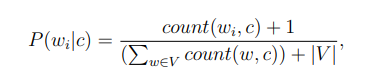 <br/>
Store inside a dictionary 'likelihoods' in the form:
$likelihoods[word] = [positiveLikelihood, negativeLikelihood, neutralLikelihood]$ </br>
> For example : </br> $likelihoods['to']=[0.3,0.57,0.23]$

In [ ]:
likelihoods = {}
# {Code Here}

In [ ]:
labelsMap = {"positive":0, "negative":1, "neutral":2}

# Predictions and Evaluation
Given a test data point, and the set of prior probabilities and likelihoods, we need to return the 'best' class c. </br>
1. We will create a vector 'prob' of length equal to the number of classes, 3. </br>
$prob = [0,0,0]$ <br/>
2. For each class c, we will initially add our prior probability to prob. </br>
3. Then for each word in the test data in our vocabulary, we will multiply the corresponding likelihood with prob. </br>
4. Finally, the maximum index of our 'prob' vector will be the predicted class for the test data point. </br>
5. Compare these to the actual labels to calculate F1_score, accuracy and confusion matrix. You can use scikit libraries for this. </br>

In [ ]:
# Predictions
for i,tweet in enumerate(ts_tweets):
  tweet = tweet.split(); 
  actual_label = labelsMap[ts_labels[i]]; 
  # {Code Here}

In [ ]:
# Evaluation
# {Code Here}

# Scikit Implementation of Naive Bayes
Use Scikit-Learn’s implementation of the na¨ıve Bayes classifier on the bag of words. Remember to implement one vs rest model with the in-built classifier in binary classification
mode. Report the accuracy, F1 score, and confusion matrix of test using the library’s
implementation.

In [ ]:
# {Code Here}